In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.colors as mcolors
from matplotlib.ticker import PercentFormatter
import warnings

In [25]:
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
sns.set()  # matplotlib grafikleri seaborn stiline geçer
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
colors = sns.color_palette("Set2")

In [26]:

# Veriyi CSV dosyasından yükleme
df = pd.read_csv("ds.csv", encoding="utf-8-sig")

In [30]:
def veri_analizi(df):
    print("1. VERİ SETİNİN GENEL YAPISI")
    print("-" * 40)
    print(f"Kayıt Sayısı: {df.shape[0]}")
    print(f"Nitelik Sayısı: {df.shape[1]}")
    print("\nNitelik Tipleri:")
    print(df.dtypes)

# Fonksiyonu çağır
veri_analizi(df)

1. VERİ SETİNİN GENEL YAPISI
----------------------------------------
Kayıt Sayısı: 77
Nitelik Sayısı: 6

Nitelik Tipleri:
Cinsiyet               object
GunlukCalismaSaati    float64
DevamsizlikGun          int64
KonulariAnlama         object
EkKaynak               object
MatematikNotu           int64
dtype: object


In [31]:

print("\n2. SAYISAL DEĞİŞKENLERİN MERKEZİ EĞİLİM VE DAĞILIM ÖLÇÜLERİ")
print("-" * 40)
sayisal_degiskenler = ['GunlukCalismaSaati', 'DevamsizlikGun', 'MatematikNotu']
for degisken in sayisal_degiskenler:
        print(f"\n{degisken} için istatistikler:")
        print(f"Ortalama: {df[degisken].mean():.2f}")
        print(f"Medyan: {df[degisken].median():.2f}")
        print(f"Mod: {df[degisken].mode().values[0]:.2f}")
        print(f"Standart Sapma: {df[degisken].std():.2f}")
        print(f"Varyans: {df[degisken].var():.2f}")
        print(f"Minimum: {df[degisken].min():.2f}")
        print(f"Maksimum: {df[degisken].max():.2f}")
        print(f"Çeyrekler Arası Aralık (IQR): {df[degisken].quantile(0.75) - df[degisken].quantile(0.25):.2f}")
veri_analizi(df)


2. SAYISAL DEĞİŞKENLERİN MERKEZİ EĞİLİM VE DAĞILIM ÖLÇÜLERİ
----------------------------------------

GunlukCalismaSaati için istatistikler:
Ortalama: 1.71
Medyan: 1.50
Mod: 1.50
Standart Sapma: 0.94
Varyans: 0.89
Minimum: 0.00
Maksimum: 3.50
Çeyrekler Arası Aralık (IQR): 1.50

DevamsizlikGun için istatistikler:
Ortalama: 3.66
Medyan: 3.00
Mod: 2.00
Standart Sapma: 3.25
Varyans: 10.60
Minimum: 0.00
Maksimum: 12.00
Çeyrekler Arası Aralık (IQR): 4.00

MatematikNotu için istatistikler:
Ortalama: 69.66
Medyan: 74.00
Mod: 79.00
Standart Sapma: 18.14
Varyans: 329.15
Minimum: 35.00
Maksimum: 95.00
Çeyrekler Arası Aralık (IQR): 25.00
1. VERİ SETİNİN GENEL YAPISI
----------------------------------------
Kayıt Sayısı: 77
Nitelik Sayısı: 6

Nitelik Tipleri:
Cinsiyet               object
GunlukCalismaSaati    float64
DevamsizlikGun          int64
KonulariAnlama         object
EkKaynak               object
MatematikNotu           int64
dtype: object


In [32]:
print("\n3. MATEMATİK NOTU İÇİN 5 SAYI ÖZETİ")
print("-" * 40)
print(f"Minimum: {df['MatematikNotu'].min():.2f}")
print(f"1. Çeyrek (Q1): {df['MatematikNotu'].quantile(0.25):.2f}")
print(f"Medyan (Q2): {df['MatematikNotu'].median():.2f}")
print(f"3. Çeyrek (Q3): {df['MatematikNotu'].quantile(0.75):.2f}")
print(f"Maksimum: {df['MatematikNotu'].max():.2f}")



3. MATEMATİK NOTU İÇİN 5 SAYI ÖZETİ
----------------------------------------
Minimum: 35.00
1. Çeyrek (Q1): 59.00
Medyan (Q2): 74.00
3. Çeyrek (Q3): 84.00
Maksimum: 95.00


In [33]:

print("\n4. CİNSİYET DEĞİŞKENİNE GÖRE FREKANS DAĞILIMI")
print("-" * 40)
cinsiyet_frekansi = df['Cinsiyet'].value_counts()
cinsiyet_yuzdesi = df['Cinsiyet'].value_counts(normalize=True) * 100

for cinsiyet, frekans in cinsiyet_frekansi.items():
        print(f"{cinsiyet}: {frekans} öğrenci (%{cinsiyet_yuzdesi[cinsiyet]:.2f})")
print("\n5. EK KAYNAK KULLANIMINA GÖRE FREKANS DAĞILIMI")
print("-" * 40)
kaynak_frekansi = df['EkKaynak'].value_counts()
kaynak_yuzdesi = df['EkKaynak'].value_counts(normalize=True) * 100

for kaynak, frekans in kaynak_frekansi.items():
        print(f"{kaynak}: {frekans} öğrenci (%{kaynak_yuzdesi[kaynak]:.2f})")




4. CİNSİYET DEĞİŞKENİNE GÖRE FREKANS DAĞILIMI
----------------------------------------
Erkek: 39 öğrenci (%50.65)
Kız: 38 öğrenci (%49.35)

5. EK KAYNAK KULLANIMINA GÖRE FREKANS DAĞILIMI
----------------------------------------
Hiçbiri: 25 öğrenci (%32.47)
Dershane: 21 öğrenci (%27.27)
Özel Ders: 16 öğrenci (%20.78)
Online Kaynaklar: 15 öğrenci (%19.48)


In [34]:
print("\n6. KONULARI ANLAMA DÜZEYİNE GÖRE FREKANS DAĞILIMI")
print("-" * 40)
anlama_frekansi = df['KonulariAnlama'].value_counts()
anlama_yuzdesi = df['KonulariAnlama'].value_counts(normalize=True) * 100

for anlama, frekans in anlama_frekansi.items():
        print(f"{anlama}: {frekans} öğrenci (%{anlama_yuzdesi[anlama]:.2f})")




6. KONULARI ANLAMA DÜZEYİNE GÖRE FREKANS DAĞILIMI
----------------------------------------
Orta: 21 öğrenci (%27.27)
İyi: 20 öğrenci (%25.97)
Zayıf: 19 öğrenci (%24.68)
Çok İyi: 17 öğrenci (%22.08)


In [35]:
print("\n7. CİNSİYET VE EK KAYNAK KULLANIMI ÇAPRAZ TABLOSU")
print("-" * 40)
cross_tab = pd.crosstab(df['Cinsiyet'], df['EkKaynak'], margins=True)
print(cross_tab)

print("\n8. CİNSİYETE GÖRE MATEMATİK NOTU ORTALAMALARI")
print("-" * 40)

for cinsiyet in df['Cinsiyet'].unique():
        ortalama = df[df['Cinsiyet'] == cinsiyet]['MatematikNotu'].mean()
        print(f"{cinsiyet} öğrencilerin matematik notu ortalaması: {ortalama:.2f}")

print("\n9. EK KAYNAK KULLANIMINA GÖRE MATEMATİK NOTU ORTALAMALARI")
print("-" * 40)

for kaynak in df['EkKaynak'].unique():
        ortalama = df[df['EkKaynak'] == kaynak]['MatematikNotu'].mean()
        print(f"{kaynak}: {ortalama:.2f}")

print("\n10. KONULARI ANLAMA DÜZEYİNE GÖRE MATEMATİK NOTU ORTALAMALARI")
print("-" * 40)

    # Konuları Anlama düzeyini sıralayalım
anlama_siralama = {'Zayıf': 1, 'Orta': 2, 'İyi': 3, 'Çok İyi': 4}

for anlama in sorted(df['KonulariAnlama'].unique(), key=lambda x: anlama_siralama.get(x, 0)):
        ortalama = df[df['KonulariAnlama'] == anlama]['MatematikNotu'].mean()
        print(f"{anlama}: {ortalama:.2f}")




7. CİNSİYET VE EK KAYNAK KULLANIMI ÇAPRAZ TABLOSU
----------------------------------------
EkKaynak  Dershane  Hiçbiri  Online Kaynaklar  Özel Ders  All
Cinsiyet                                                     
Erkek            6       20                 6          7   39
Kız             15        5                 9          9   38
All             21       25                15         16   77

8. CİNSİYETE GÖRE MATEMATİK NOTU ORTALAMALARI
----------------------------------------
Erkek öğrencilerin matematik notu ortalaması: 60.79
Kız öğrencilerin matematik notu ortalaması: 78.76

9. EK KAYNAK KULLANIMINA GÖRE MATEMATİK NOTU ORTALAMALARI
----------------------------------------
Dershane: 76.90
Hiçbiri: 46.84
Özel Ders: 89.38
Online Kaynaklar: 76.53

10. KONULARI ANLAMA DÜZEYİNE GÖRE MATEMATİK NOTU ORTALAMALARI
----------------------------------------
Zayıf: 42.42
Orta: 67.48
İyi: 80.15
Çok İyi: 90.47


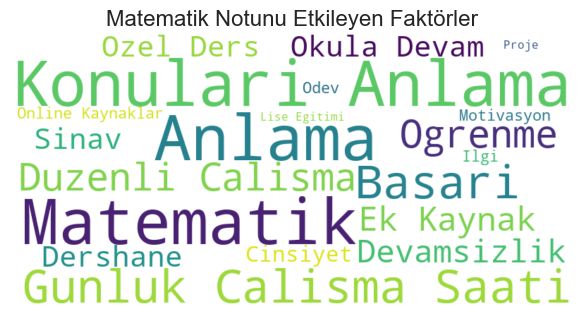

In [53]:
def veri_gorsellestirme(df):
 
    # 2.1. WordCloud: Matematik Notunu Etkileyen Faktörler
    # Faktörlerin önem ağırlıkları
    importance_dict = {
        'Konulari Anlama': 5,
        'Gunluk Calisma Saati': 4,
        'Ek Kaynak': 3,
        'Devamsizlik': 3,
        'Cinsiyet': 2,
        'Basari': 4,
        'Matematik': 5,
        'Ozel Ders': 3,
        'Dershane': 3,
        'Online Kaynaklar': 2,
        'Duzenli Calisma': 4,
        'Okula Devam': 3,
        'Ilgi': 2,
        'Motivasyon': 2,
        'Lise Egitimi': 1,
        'Odev': 2,
        'Sinav': 3,
        'Proje': 1,
        'Ogrenme': 4,
        'Anlama': 5
    }
    
    # Wordcloud oluştur
    plt.figure(figsize=(6, 6))
    wc = WordCloud(
        background_color='white',
        width=800,
        height=400,
        colormap='viridis'
    ).generate_from_frequencies(importance_dict)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Matematik Notunu Etkileyen Faktörler', fontsize=16)
    plt.tight_layout()
    plt.show()
veri_gorsellestirme(df)   


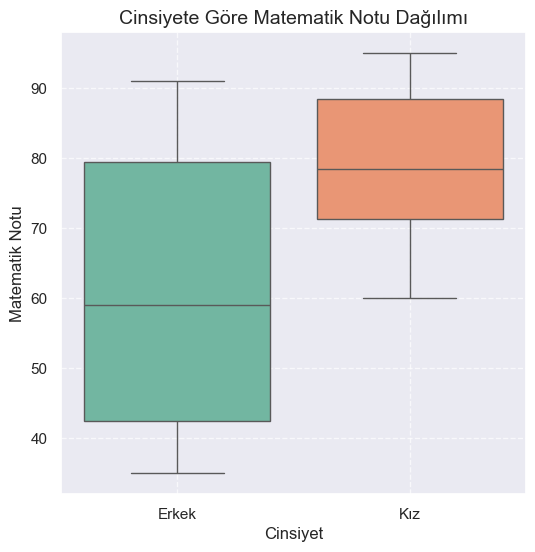

In [55]:
# 2.2. Kutu Grafiği: Cinsiyete Göre Matematik Notu Dağılımı
plt.figure(figsize=(6, 6))
sns.boxplot(x='Cinsiyet', y='MatematikNotu', data=df, palette='Set2')
plt.title('Cinsiyete Göre Matematik Notu Dağılımı', fontsize=14)
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Matematik Notu', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
plt.close()

<Axes: xlabel='GunlukCalismaSaati', ylabel='MatematikNotu'>

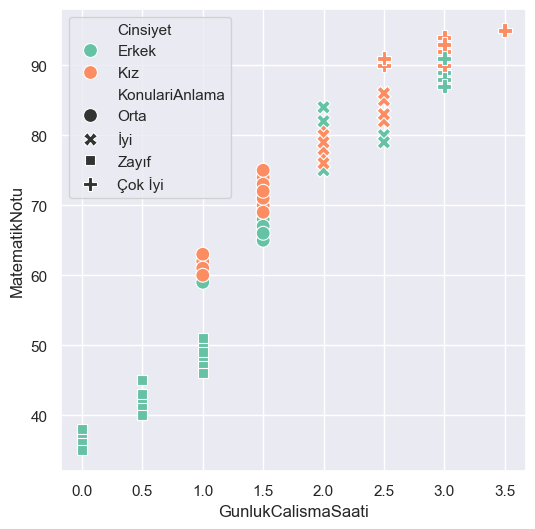

In [57]:
# 2.3. Saçılım Grafiği: Günlük Çalışma Saati ve Matematik Notu İlişkisi
plt.figure(figsize=(6, 6))
sns.scatterplot(x='GunlukCalismaSaati', y='MatematikNotu',
                    hue='Cinsiyet', style='KonulariAnlama',
                    palette='Set2', s=100, data=df)

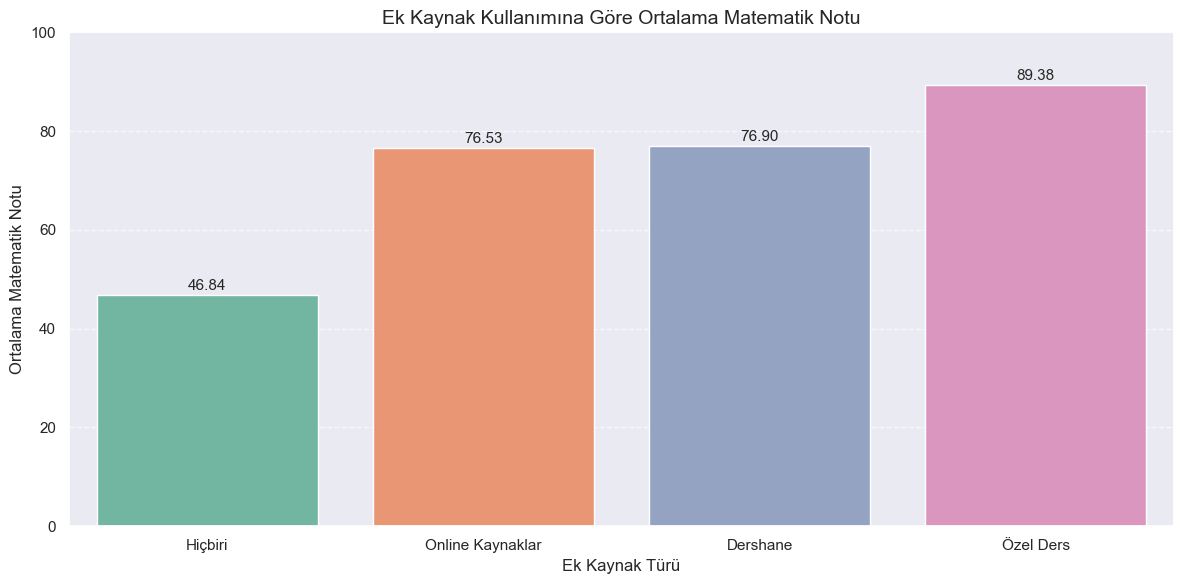

In [59]:
# 2.4. Çubuk Grafik: Ek Kaynak Kullanımına Göre Ortalama Matematik Notu
plt.figure(figsize=(12, 6))

    # Ek Kaynak türlerine göre ortalama matematik notları
avg_by_resource = df.groupby('EkKaynak')['MatematikNotu'].mean().sort_values()

ax = sns.barplot(x=avg_by_resource.index, y=avg_by_resource.values, palette='Set2')

plt.title('Ek Kaynak Kullanımına Göre Ortalama Matematik Notu', fontsize=14)
plt.xlabel('Ek Kaynak Türü', fontsize=12)
plt.ylabel('Ortalama Matematik Notu', fontsize=12)
plt.ylim(0, 100)


for i, val in enumerate(avg_by_resource.values):
        ax.text(i, val + 1, f'{val:.2f}', ha='center', fontsize=11)

plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()

plt.close()

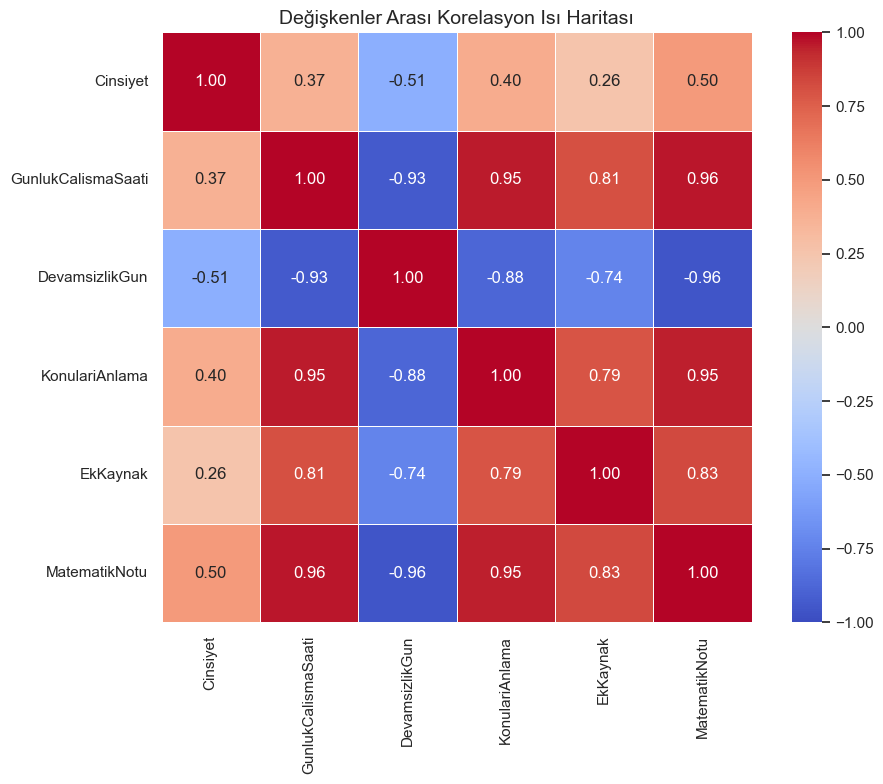

In [60]:
 # 2.5. Isı Haritası: Değişkenler Arası Korelasyon
plt.figure(figsize=(10, 8))

    # Kategorik değişkenleri sayısallaştırma
df_corr = df.copy()


df_corr['Cinsiyet'] = df_corr['Cinsiyet'].map({'Erkek': 0, 'Kız': 1})


anlama_dict = {'Zayıf': 1, 'Orta': 2, 'İyi': 3, 'Çok İyi': 4}
df_corr['KonulariAnlama'] = df_corr['KonulariAnlama'].map(anlama_dict)


kaynak_dict = {'Hiçbiri': 0, 'Dershane': 1, 'Online Kaynaklar': 2, 'Özel Ders': 3}
df_corr['EkKaynak'] = df_corr['EkKaynak'].map(kaynak_dict)

    # Korelasyon matrisini hesapla
correlation_matrix = df_corr.corr()

    # Korelasyon ısı haritası
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
                vmin=-1, vmax=1, center=0, fmt='.2f', square=True)

plt.title('Değişkenler Arası Korelasyon Isı Haritası', fontsize=14)
plt.tight_layout()
plt.show()

plt.close()


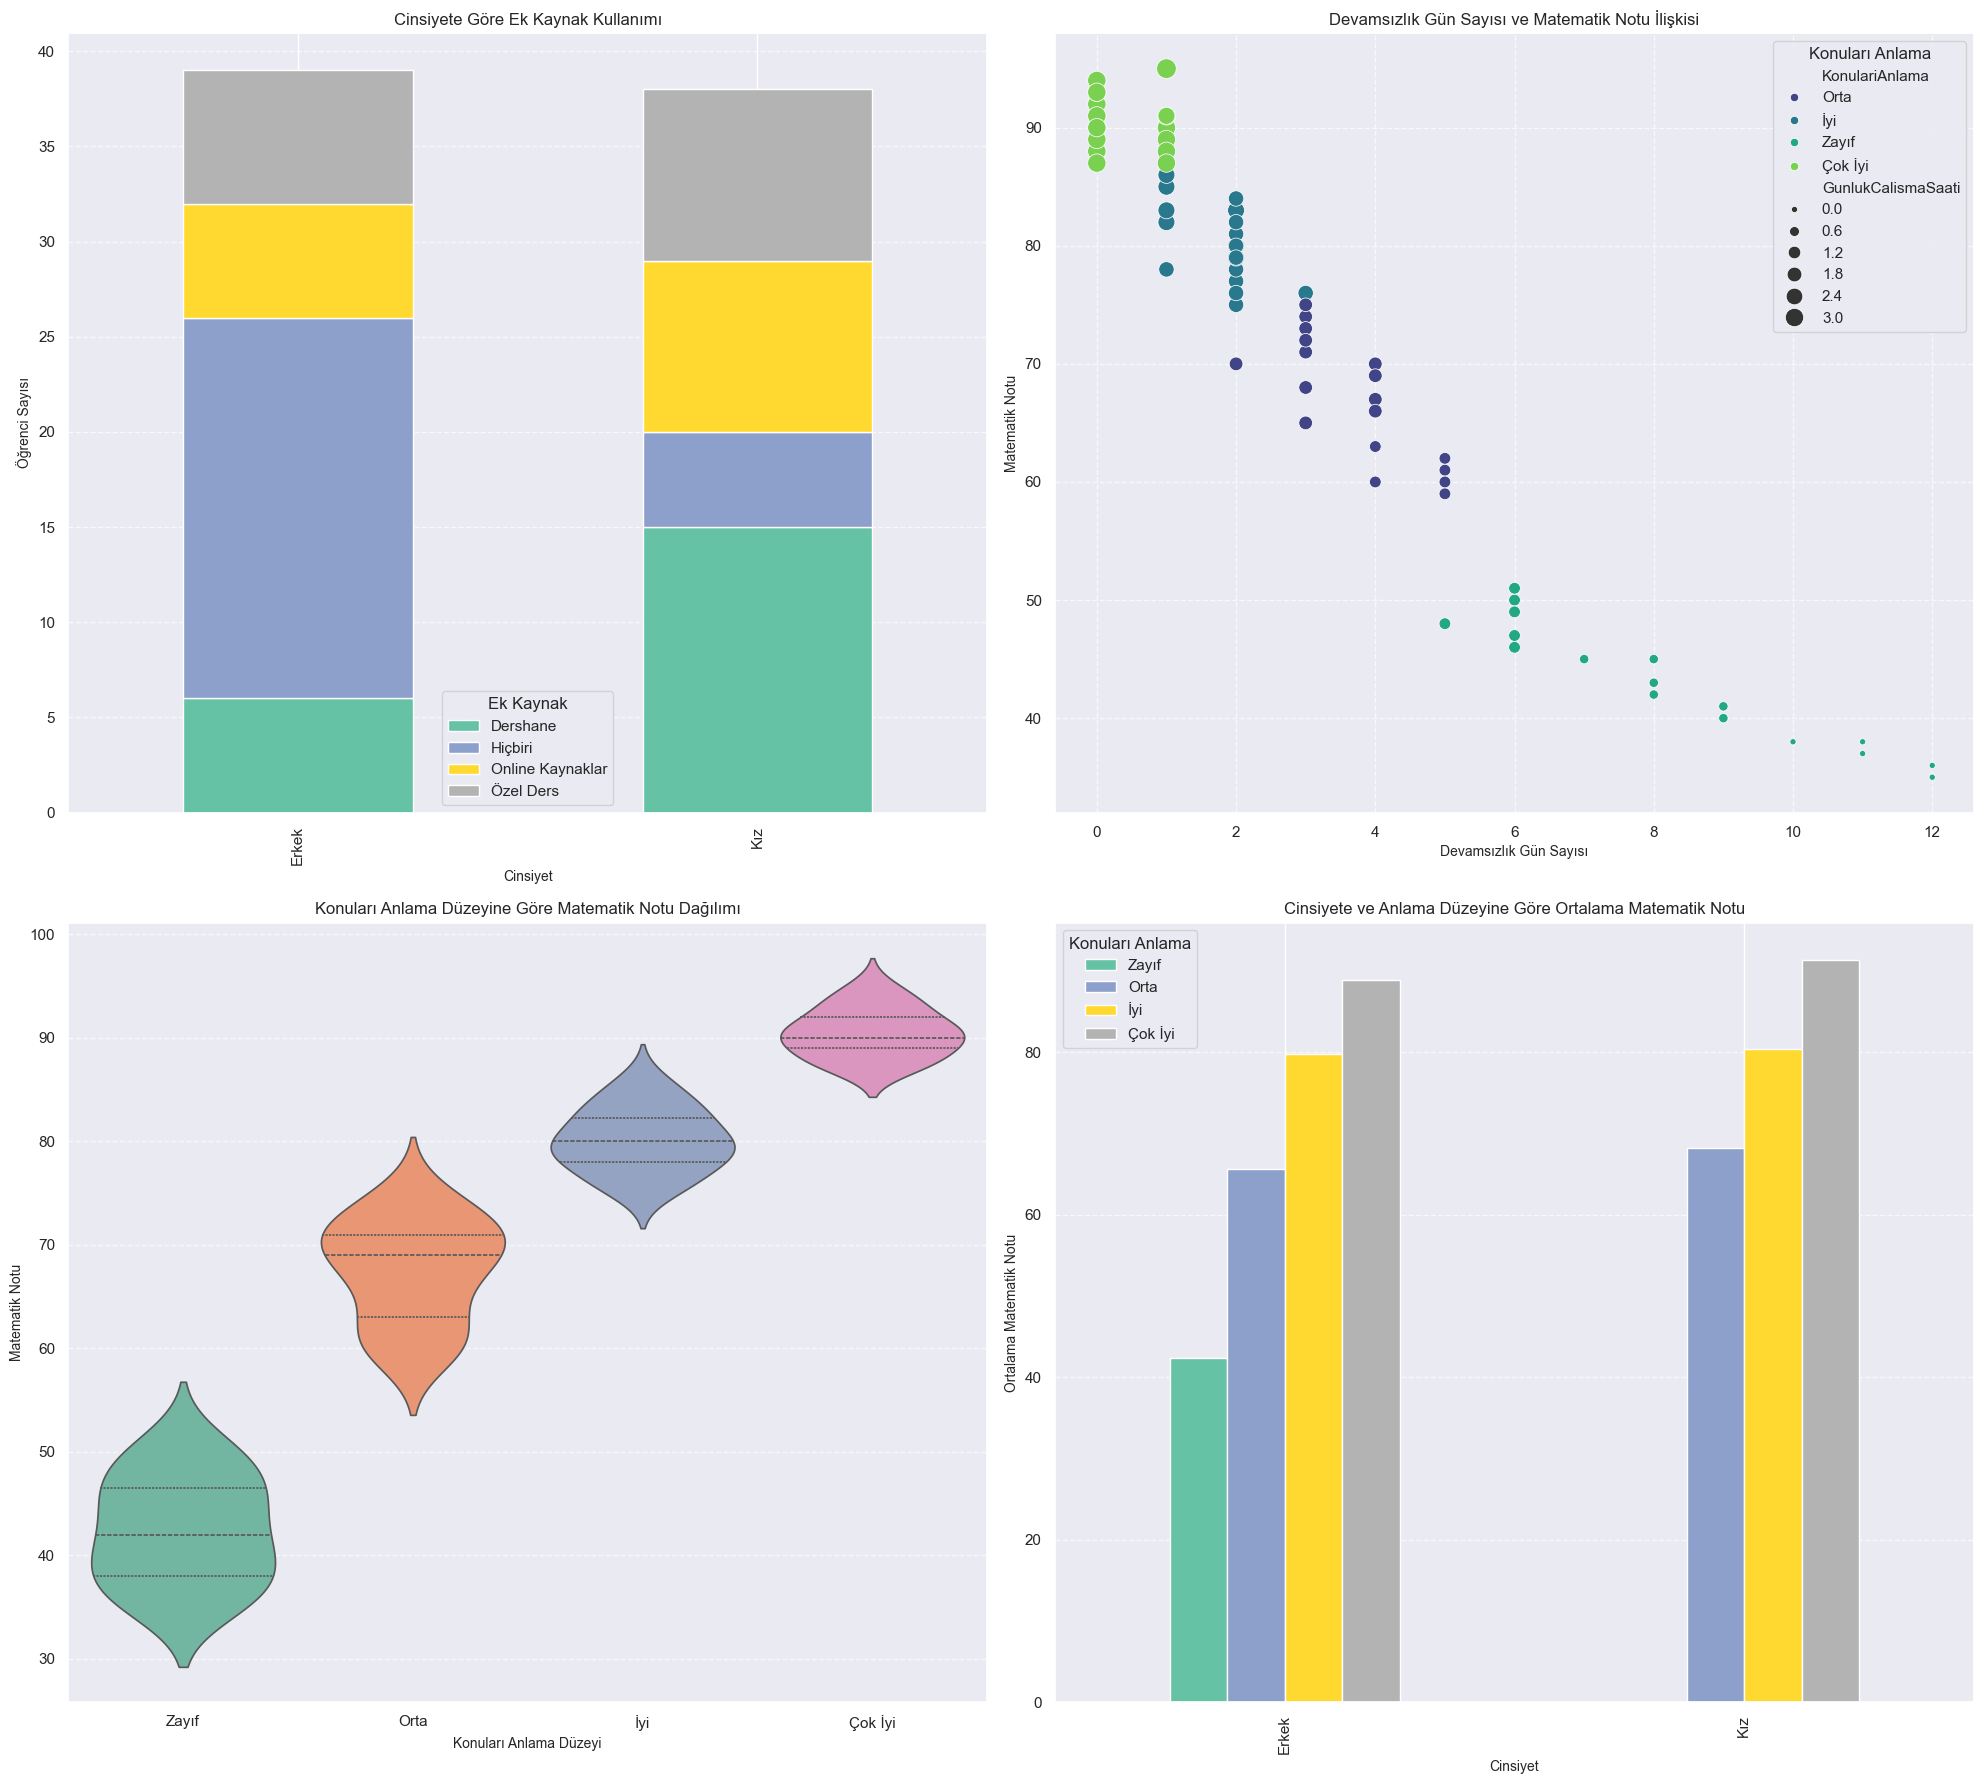

In [ ]:
# Çoklu Görselleştirme Raporu
def coklugorsellestirmeraporu(df):
    # Tek bir büyük figür oluştur
    plt.figure(figsize=(20, 18))

    # 1. Cinsiyet ve Ek Kaynak ilişkisi - Çubuk Grafik
    plt.subplot(2, 2, 1)
    gender_resource = pd.crosstab(df['Cinsiyet'], df['EkKaynak'])
    gender_resource.plot(kind='bar', stacked=True, ax=plt.gca(),
                         colormap='Set2')
    plt.title('Cinsiyete Göre Ek Kaynak Kullanımı', fontsize=12)
    plt.xlabel('Cinsiyet', fontsize=10)
    plt.ylabel('Öğrenci Sayısı', fontsize=10)
    plt.legend(title='Ek Kaynak')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 2. Devamsızlık ve Matematik Notu - Saçılım Grafiği
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='DevamsizlikGun', y='MatematikNotu',
                    hue='KonulariAnlama', size='GunlukCalismaSaati',
                    sizes=(20, 200), palette='viridis', data=df)
    plt.title('Devamsızlık Gün Sayısı ve Matematik Notu İlişkisi', fontsize=12)
    plt.xlabel('Devamsızlık Gün Sayısı', fontsize=10)
    plt.ylabel('Matematik Notu', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Konuları Anlama', loc='upper right')

    # 3. Konuları Anlama Düzeyine Göre Matematik Notu Dağılımı - Violin Plot
    plt.subplot(2, 2, 3)
    # Konuları Anlama düzeyini sıralama
    anlama_order = ['Zayıf', 'Orta', 'İyi', 'Çok İyi']
    sns.violinplot(x='KonulariAnlama', y='MatematikNotu', data=df,
                   order=anlama_order, palette='Set2', inner='quartile')
    plt.title('Konuları Anlama Düzeyine Göre Matematik Notu Dağılımı', fontsize=12)
    plt.xlabel('Konuları Anlama Düzeyi', fontsize=10)
    plt.ylabel('Matematik Notu', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # 4. Cinsiyete ve Anlama Düzeyine Göre Ortalama Matematik Notu - Bar Plot
    plt.subplot(2, 2, 4)
    gender_understanding = df.groupby(['Cinsiyet', 'KonulariAnlama'])['MatematikNotu'].mean().unstack()
    gender_understanding = gender_understanding[anlama_order]  # Anlama düzeyine göre sırala
    gender_understanding.plot(kind='bar', ax=plt.gca(), colormap='Set2')
    plt.title('Cinsiyete ve Anlama Düzeyine Göre Ortalama Matematik Notu', fontsize=12)
    plt.xlabel('Cinsiyet', fontsize=10)
    plt.ylabel('Ortalama Matematik Notu', fontsize=10)
    plt.legend(title='Konuları Anlama')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
coklugorsellestirmeraporu(df)